<a href="https://colab.research.google.com/github/1729David/fast.ai.deeplearning.v3/blob/master/lesson1_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [0]:
path = Path('fastai/lesson1')


In [8]:
path.ls()

[PosixPath('fastai/lesson1/poison_ivy'),
 PosixPath('fastai/lesson1/blackberry'),
 PosixPath('fastai/lesson1/.ipynb_checkpoints')]

In [0]:
classes = ['blackberry', 'poison_ivy']

In [0]:
bs = 16

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, size=224, num_workers=4, bs=bs).normalize(imagenet_stats)

In [18]:
data.classes

['blackberry', 'poison_ivy']

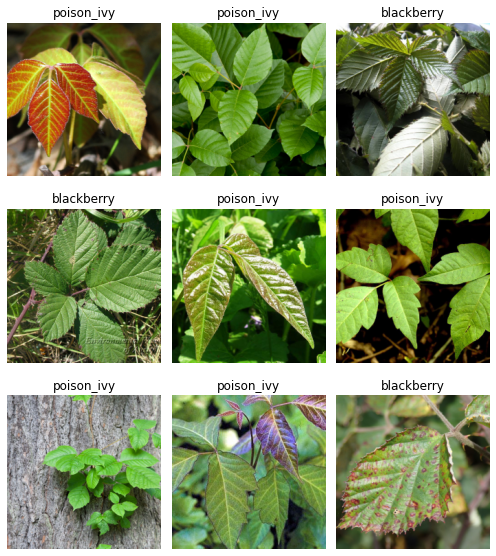

In [24]:
data.show_batch(rows=3, figsize=(7,8))

In [25]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['blackberry', 'poison_ivy'], 2, 48, 12)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [27]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.400722,0.274949,0.166667,00:04
1,0.867944,0.082817,0.000000,00:04
2,0.610882,0.102083,0.000000,00:03
3,0.475468,0.103688,0.083333,00:04


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


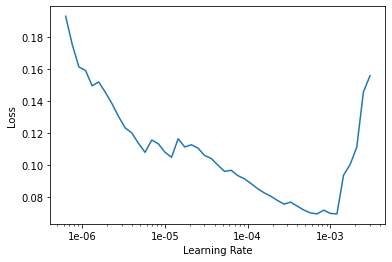

In [32]:
learn.recorder.plot()

In [0]:
learn.save('stage-2')

In [34]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (48 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
poison_ivy,poison_ivy,poison_ivy,poison_ivy,poison_ivy
Path: fastai/lesson1;

Valid: LabelList (12 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
poison_ivy,poison_ivy,blackberry,blackberry,poison_ivy
Path: fastai/lesson1;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2

In [35]:
interp = ClassificationInterpretation.from_learner(learn)

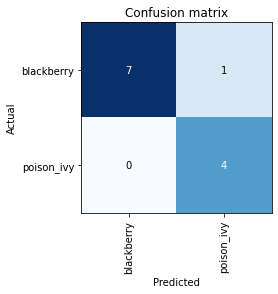

In [36]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch(bs=bs)
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

In [47]:
learn_cln.load('stage-2')

Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 230, in _feed
    close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


Learner(data=ImageDataBunch;

Train: LabelList (60 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
poison_ivy,poison_ivy,poison_ivy,poison_ivy,poison_ivy
Path: fastai/lesson1;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: fastai/lesson1;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3

In [49]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

In [0]:
img = open_image('test/poison_ivy_31.jpg')

In [0]:
learn = load_learner(path)

In [56]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category poison_ivy